In [1]:
!pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.6/dist-packages (0.7)


In [2]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [3]:
assert ran_the_first_cell, "Oh noes!"

In [4]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [5]:
p = [2, 'tres', 7.0, 8, 166.0, "sixteen"]
p

[2, 'tres', 7.0, 8, 166.0, 'sixteen']

In [6]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [7]:
primero = p[0]
segundo = p[1]
print("primero:", primero)
print("segundo:", segundo)

primero: 2
segundo: tres


In [8]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [9]:
ultimo = p[-1]
penultimo = p[-2]
print("ultimo:", ultimo)
print("penultimo:", penultimo)

ultimo: sixteen
penultimo: 166.0


In [10]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [11]:
sublista = p[1:3]
sublista

['tres', 7.0]

In [12]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [13]:
primeros_tres = p[:3]
primeros_tres

[2, 'tres', 7.0]

In [14]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [15]:
ultimos_tres = p[3:]
ultimos_tres 

[8, 166.0, 'sixteen']

In [16]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [17]:
o = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h','i','j','k','l']
o[1:13:2]

['b', 'd', 'f', 'h', 'j', 'l']

In [18]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [19]:
o[::-1]

['l', 'k', 'j', 'i', 'h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [20]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [21]:
q = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Antes:", q)
q.append('once')
print("Despues:", q)

Antes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Despues: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'once']


In [22]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [23]:
q = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[a * 2 for a in q]

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [24]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [25]:
actores = {'Emma': 'Watson', 'Daniel': 'Radcliffe', 'Rupert': 'Grint'}
actores

{'Daniel': 'Radcliffe', 'Emma': 'Watson', 'Rupert': 'Grint'}

In [26]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [27]:
actores['Tom'] = 'Felton'
actores

{'Daniel': 'Radcliffe', 'Emma': 'Watson', 'Rupert': 'Grint', 'Tom': 'Felton'}

In [28]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [29]:
del actores['Tom']
actores

{'Daniel': 'Radcliffe', 'Emma': 'Watson', 'Rupert': 'Grint'}

In [30]:
# No slicing.
#philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [31]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [32]:
g = [[1, 5, 7],
     [2, 8, 13],
     [5, 4, 56],
     [2, 2, 2]]

u = [[1, 2, 6, 4],
     [2, 7, 4, 5]]

In [33]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [34]:
def matmult(G, U):
    """Multiply matrix G by matrix U."""
    filas = len(G)
    columnas = len(U[0])
    salida = [[0 for colum in range(columnas)] for fil in range(filas)]
    
    for i in range(filas):
        for j in range(columnas):
            for k in range(len(U)):
                salida[i][j] += G[i][k] * U[k][j]
    return salida

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [35]:
%%time

matmul(a, b)

CPU times: user 27 µs, sys: 4 µs, total: 31 µs
Wall time: 34.8 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [36]:
%%time

matmult(g, u)

CPU times: user 29 µs, sys: 5 µs, total: 34 µs
Wall time: 38.1 µs


[[11, 37, 26, 29], [18, 60, 44, 48], [13, 38, 46, 40], [6, 18, 20, 18]]

In [37]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.5076869886492817, 0.6228431127785256, 0.9706302735397607],
 [0.7883798080786517, 0.2409409615299114, 0.9471475443721503]]

In [38]:
import random
def matriz_aleatoria(t, a):
    out = []
    for row in range(t):
        out.append([random.random() for _ in range(a)])
    return out

randm = matriz_aleatoria(4, 3)
randm

[[0.5826372425528278, 0.7251297394497448, 0.9545271364687042],
 [0.27766435054359173, 0.961224147709754, 0.4915314964995965],
 [0.4783337686005016, 0.8270692863061321, 0.6633447784249447],
 [0.3174106892176428, 0.8019370994207435, 0.513198063080302]]

In [39]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 6.94 s, sys: 25.5 ms, total: 6.97 s
Wall time: 7.03 s


In [40]:
%%time
randc = matriz_aleatoria(400, 100)
randd = matriz_aleatoria(100, 400)
b = matmult(randc, randd)

CPU times: user 3.03 s, sys: 14 ms, total: 3.04 s
Wall time: 3.05 s


In [41]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [42]:
def producto_punto_py(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [43]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [44]:
%%fortran
subroutine producto_punto_fort(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [45]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [46]:
lista_datos = [float(t) for t in range(100)]
datos_arreglo = np.array(lista_datos)

In [47]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.2 ms, sys: 0 ns, total: 12.2 ms
Wall time: 13.5 ms


333328333350000.0

In [48]:
%%time
producto_punto_py(lista_datos, lista_datos)

CPU times: user 25 µs, sys: 1 µs, total: 26 µs
Wall time: 29.3 µs


328350.0

In [49]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 209 µs, sys: 0 ns, total: 209 µs
Wall time: 215 µs


333328333350000.0

In [50]:
%%time
producto_punto_fort(datos_arreglo, datos_arreglo)

CPU times: user 16 µs, sys: 0 ns, total: 16 µs
Wall time: 20.3 µs


328350.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [51]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [52]:
def multi_elementos(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

multi_elementos([5, 1, 2, 1], [1, 3 + 5j, 3.0, 'tres'])
#[type(x) for x in _]

[5, (3+5j), 6.0, 'tres']

In [53]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [54]:
codigo_fuente = 'a + b * c / d'
bytecode = compile(codigo_fuente, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 LOAD_NAME                3 (d)
             10 BINARY_TRUE_DIVIDE
             12 BINARY_ADD
             14 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [55]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [56]:
datos = np.array([5, 10, 15, 20])
datos

array([ 5, 10, 15, 20])

In [57]:
data + data

array([2, 4, 6, 8])

In [58]:
datos + datos

array([10, 20, 30, 40])

In [59]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.02 ms, sys: 35 µs, total: 1.05 ms
Wall time: 1.51 ms


333328333350000.0

In [60]:
%%time
(array_data + array_data).sum()

CPU times: user 454 µs, sys: 16 µs, total: 470 µs
Wall time: 479 µs


9999900000.0

In [61]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.37 ms, sys: 6.98 ms, total: 9.35 ms
Wall time: 10.5 ms


333328333350000.0

In [62]:
%%time
# producto punto incorporado
array_data.dot(array_data)

CPU times: user 251 µs, sys: 0 ns, total: 251 µs
Wall time: 131 µs


333328333350000.0

In [63]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 348 µs, sys: 13 µs, total: 361 µs
Wall time: 185 µs


333328333350000.0

In [64]:
%%time
producto_punto_fort(array_data, array_data)

CPU times: user 202 µs, sys: 7 µs, total: 209 µs
Wall time: 217 µs


333328333350000.0

In [65]:
# Numpy won't allow us to write a string into an int array.
#data[0] = "foo"

In [66]:
# We also can't grow an array once it's created.
#data.append(3)

In [67]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [68]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [69]:
arreglo = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int32').reshape(2, 5)
print("Array:\n", arreglo, sep='')
print("===========")
print("DType:", arreglo.dtype)
print("Shape:", arreglo.shape)
print("Strides:", arreglo.strides)
print("Data:", arreglo.data.tobytes())

Array:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
DType: int32
Shape: (2, 5)
Strides: (20, 4)
Data: b'\x01\x00\x00\x00\x02\x00\x00\x00\x03\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00\x06\x00\x00\x00\x07\x00\x00\x00\x08\x00\x00\x00\t\x00\x00\x00\n\x00\x00\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [70]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [71]:
datos = np.arange(25).reshape(5, 5)
datos

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [72]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [73]:
datos * datos

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576]])

In [74]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [75]:
np.sqrt(datos)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894],
       [4.47213595, 4.58257569, 4.69041576, 4.79583152, 4.89897949]])

In [76]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [77]:
(datos % 5) == 0

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False]])

In [78]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [79]:
((datos % 5) == 0) & ((datos % 2) == 0)  

array([[ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False]])

In [80]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [81]:
datos @ datos.T

array([[  30,   80,  130,  180,  230],
       [  80,  255,  430,  605,  780],
       [ 130,  430,  730, 1030, 1330],
       [ 180,  605, 1030, 1455, 1880],
       [ 230,  780, 1330, 1880, 2430]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [82]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [83]:
senos= np.sin(np.linspace(0, 3.14, 20))
cosenos = np.cos(np.linspace(0, 3.14, 20))
senos
cosenos

array([ 1.        ,  0.9863751 ,  0.94587166,  0.87959341,  0.78934641,
        0.67758987,  0.54736914,  0.4022327 ,  0.2461355 ,  0.08333116,
       -0.08174394, -0.24459154, -0.40077406, -0.54603556, -0.67641771,
       -0.7883676 , -0.87883463, -0.94535358, -0.98611184, -0.99999873])

In [84]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [85]:
senos[3]

0.4757262153019581

In [86]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [87]:
senos[:5] #Primeros 5 Elementos

array([0.        , 0.16451191, 0.3245409 , 0.47572622, 0.61394808])

In [88]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [89]:
senos[6:] # elementos del 6 en adelante

array([0.83689129, 0.91553747, 0.96923543, 0.99652191, 0.99665336,
       0.96962621, 0.91617692, 0.837762  , 0.73651822, 0.61520446,
       0.4771265 , 0.32604693, 0.16608265, 0.00159265])

In [90]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [91]:
senos[::6]

array([0.        , 0.83689129, 0.91617692, 0.16608265])

In [92]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [93]:
print("senos:\n", senos)
print("senos > 0.7:\n", senos > 0.7)
print("senos[senos > 0.9]:\n", senos[senos > 0.9])

senos:
 [0.         0.16451191 0.3245409  0.47572622 0.61394808 0.73543998
 0.83689129 0.91553747 0.96923543 0.99652191 0.99665336 0.96962621
 0.91617692 0.837762   0.73651822 0.61520446 0.4771265  0.32604693
 0.16608265 0.00159265]
senos > 0.7:
 [False False False False False  True  True  True  True  True  True  True
  True  True  True False False False False False]
senos[senos > 0.9]:
 [0.91553747 0.96923543 0.99652191 0.99665336 0.96962621 0.91617692]


In [94]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [95]:
print(senos)
senos[[0, 2 ,5]]

[0.         0.16451191 0.3245409  0.47572622 0.61394808 0.73543998
 0.83689129 0.91553747 0.96923543 0.99652191 0.99665336 0.96962621
 0.91617692 0.837762   0.73651822 0.61520446 0.4771265  0.32604693
 0.16608265 0.00159265]


array([0.        , 0.3245409 , 0.73543998])

In [96]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [97]:
datos_desordenados = np.array([3, 5 ,8 ,-2 ,3])

In [98]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [99]:
indices_desordenados = np.argsort(datos_desordenados)
indices_desordenados

array([3, 0, 4, 1, 2])

In [100]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [101]:
datos_desordenados[indices_desordenados]

array([-2,  3,  3,  5,  8])

In [102]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [103]:
capitali_mercados = np.array([5, 15, 10, 25, 35])
bienes = np.array(['Z', 'X', 'Y', 'U', 'W'])

In [104]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [105]:
orden_por_cm = np.argsort(capitali_mercados)
bienes[orden_por_cm]

array(['Z', 'Y', 'X', 'U', 'W'], dtype='<U1')

In [106]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [107]:
print("Fechas:\n", repr(event_dates))
print("Valores:\n", repr(event_values))
print("Calendario:\n", repr(calendar))

Fechas:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Valores:
 array([10, 15, 20])
Calendario:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [108]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [109]:
print("Fechas brutas:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Fechas llenas hacia adelante:", calendar[calendar.searchsorted(event_dates)])

Fechas brutas: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Fechas llenas hacia adelante: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [110]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [111]:
datos = np.arange(10).reshape(2, 5)
datos

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [112]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [113]:
datos[:2, :2] #Primeras dos filas y primeras dos columnas.

array([[0, 1],
       [5, 6]])

In [114]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [115]:
datos[:4, [0, -2]]

array([[0, 3],
       [5, 8]])

In [116]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [117]:
datos[(datos[:, 0] % 1) == 0]

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [118]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [119]:
def funcdan(x):
    return ((x - x.mean()) ** 5).sum() / len(x*2)

In [120]:
variance(np.random.standard_normal(1000))

0.9473156479669349

In [121]:
funcdan(np.random.standard_normal(5000))

0.4221406395678527

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [122]:
data = np.arange(30)
data.mean()

14.5

In [123]:
datos = np.arange(50)
datos.mean()

24.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [124]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [125]:
datos = np.arange(50).reshape(5, 10)
datos

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [126]:
data.mean()

14.5

In [127]:
datos.mean()

24.5

In [128]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [129]:
datos.mean(axis=0)

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29.])

In [130]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [131]:
datos.mean(axis=1)

array([ 4.5, 14.5, 24.5, 34.5, 44.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [132]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [133]:
fila = np.array([1, 2, 3, 4, 5, 6, 7, 8])
columna = np.array([[1], [2], [3], [4], [5]])
print("Fila:\n", fila, sep='')
print("Columna:\n", columna, sep='')

Fila:
[1 2 3 4 5 6 7 8]
Columna:
[[1]
 [2]
 [3]
 [4]
 [5]]


In [134]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [135]:
fila + columna

array([[ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11],
       [ 5,  6,  7,  8,  9, 10, 11, 12],
       [ 6,  7,  8,  9, 10, 11, 12, 13]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [136]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [137]:
print("Datos:\n", datos, sep='')
print("Media:\n", datos.mean(axis=0), sep='')
print("Datos - Media:\n", datos - datos.mean(axis=0), sep='')

Datos:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
Media:
[20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
Datos - Media:
[[-20. -20. -20. -20. -20. -20. -20. -20. -20. -20.]
 [-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]
 [ 20.  20.  20.  20.  20.  20.  20.  20.  20.  20.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [138]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [139]:
a = pd.Series(index=['1', '2', '3', '4', '5'], data=[0, 5, 10, 15, 20])
a

1     0
2     5
3    10
4    15
5    20
dtype: int64

In [140]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [141]:
print("El indice es:", a.index)
print("Los valores son:", a.values)

El indice es: Index(['1', '2', '3', '4', '5'], dtype='object')
Los valores son: [ 0  5 10 15 20]


In [142]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [143]:
a.iloc[3]

15

In [144]:
# ... or by label.
s.loc['a']

1

In [145]:
a.loc['3']

10

In [146]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [147]:
a.iloc[:3]

1     0
2     5
3    10
dtype: int64

In [148]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [149]:
a.loc[:'5']

1     0
2     5
3    10
4    15
5    20
dtype: int64

In [150]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [151]:
a.iloc[[0, -4, 2, -2, 4]]

1     0
2     5
3    10
4    15
5    20
dtype: int64

In [152]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [153]:
a.loc[a > 2]

2     5
3    10
4    15
5    20
dtype: int64

In [154]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [155]:
otra_a = pd.Series({'1': 5.0, '2': 20.0, '3': 300.0, '4': 405.0})
otra_a

1      5.0
2     20.0
3    300.0
4    405.0
dtype: float64

In [156]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [157]:
a + otra_a

1      5.0
2     25.0
3    310.0
4    420.0
5      NaN
dtype: float64

In [158]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [159]:
(a + otra_a).fillna(0.0)

1      5.0
2     25.0
3    310.0
4    420.0
5      0.0
dtype: float64

In [160]:

# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [161]:
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()
aapl.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400
2018-03-29,167.804993,171.750000,166.899994,167.779999,167.779999,38398505


In [162]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Open,High
Date,,
2014-09-29,100.589996,100.690002
2014-10-06,99.949997,102.379997


In [163]:
aapl.iloc[:1, :1]

,Open
Date,
2014-09-29,100.589996


In [164]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


In [165]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Open', 'High']]

,Open,High
Date,,


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

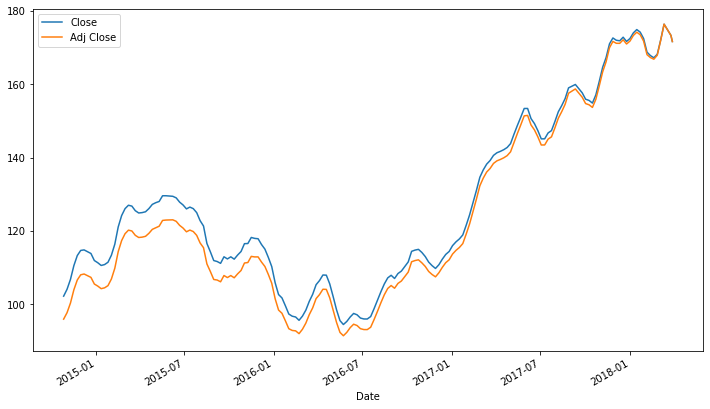

In [166]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

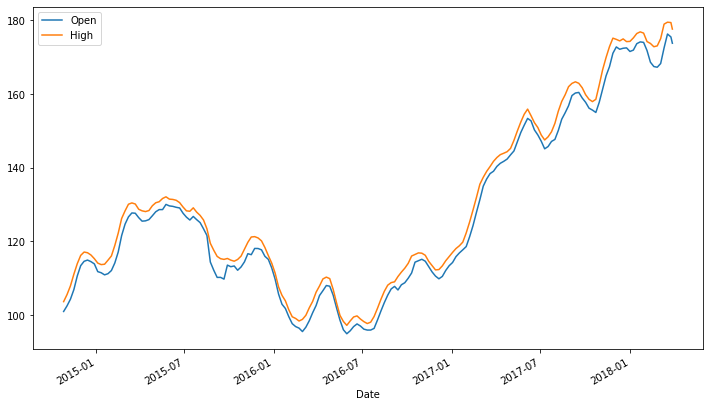

In [167]:
aapl.rolling(5)[['Open', 'High']].mean().plot();

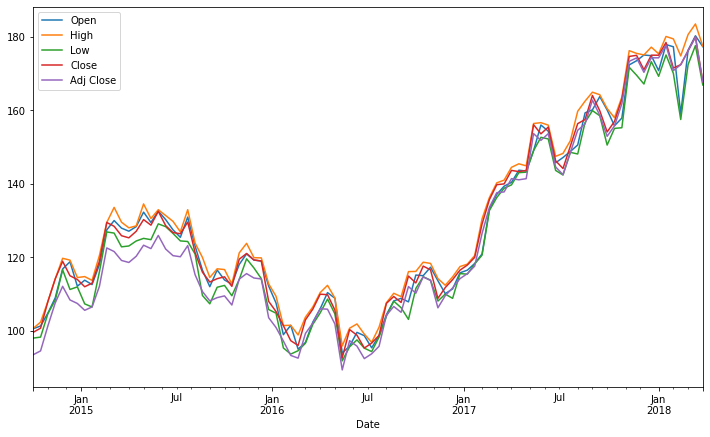

In [168]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

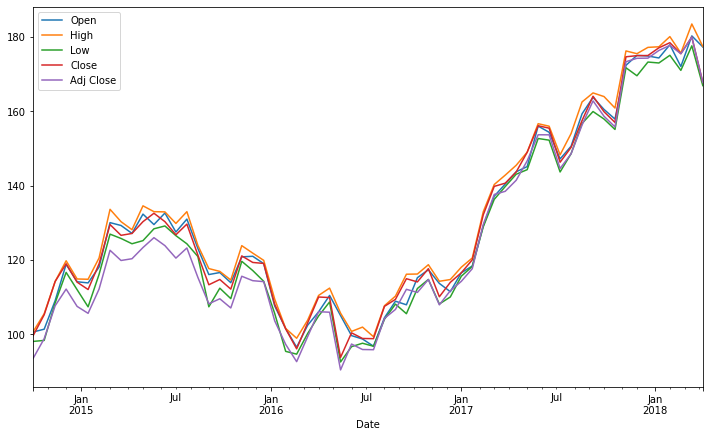

In [169]:
aapl.drop('Volume', axis=1).resample('3W').max().plot();

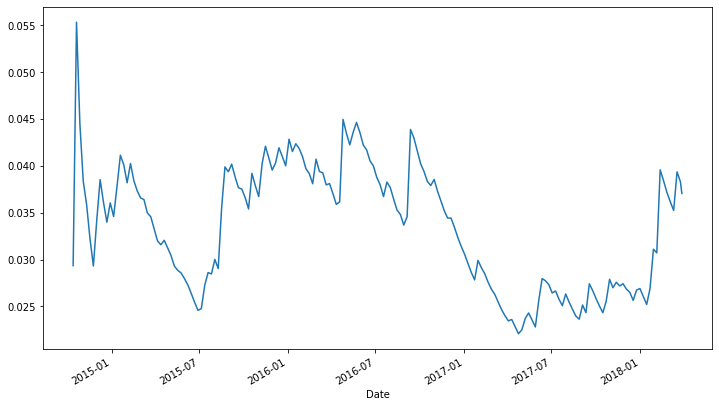

In [170]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

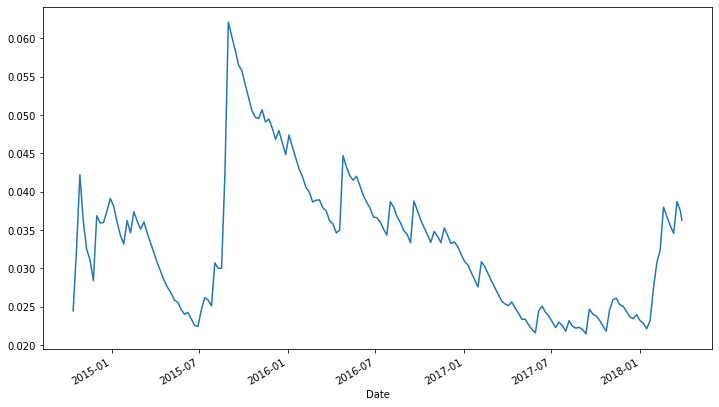

In [171]:
aapl['Low'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [172]:
from avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [173]:
avocados = read_avocadata('2015', '2017')
avocados.tail()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
1938,2015-12-18 00:00:00+00:00,SOUTHWEST,GREENSKIN,False,48,0.16,0.16,0.16
1939,2015-12-18 00:00:00+00:00,NORTHWEST,HASS,False,676,1.45,0.68,2.50
1940,2015-12-18 00:00:00+00:00,NORTHWEST,HASS,True,40,1.55,1.50,1.67
1941,2015-12-18 00:00:00+00:00,HAWAII,HASS,False,51,1.76,1.50,1.99
1942,2015-12-18 00:00:00+00:00,ALASKA,HASS,False,11,1.90,1.50,1.99


In [174]:
#Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

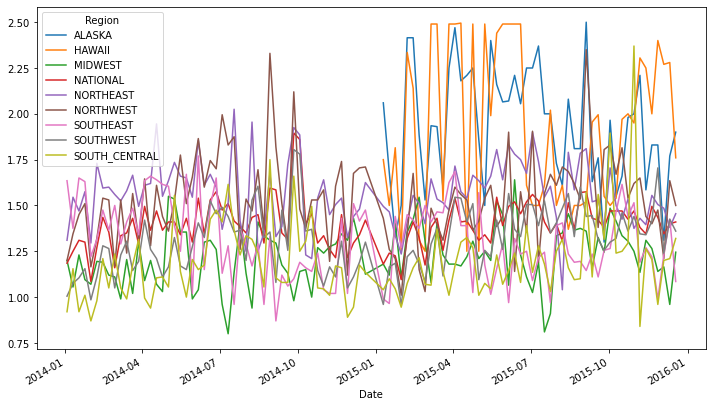

In [175]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

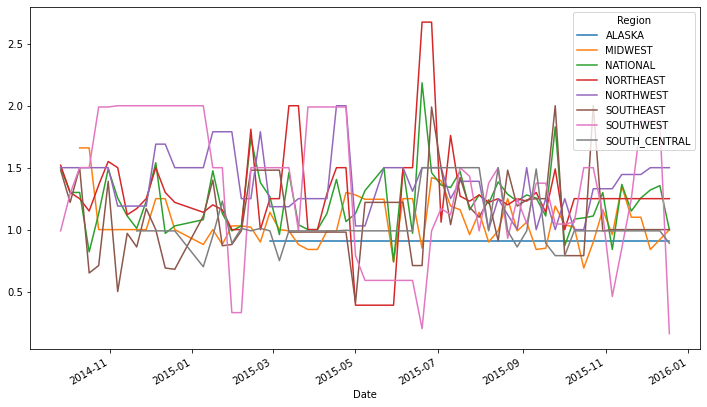

In [176]:
greenskin = avocados[avocados.Variety == 'GREENSKIN']
greenskin.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [177]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

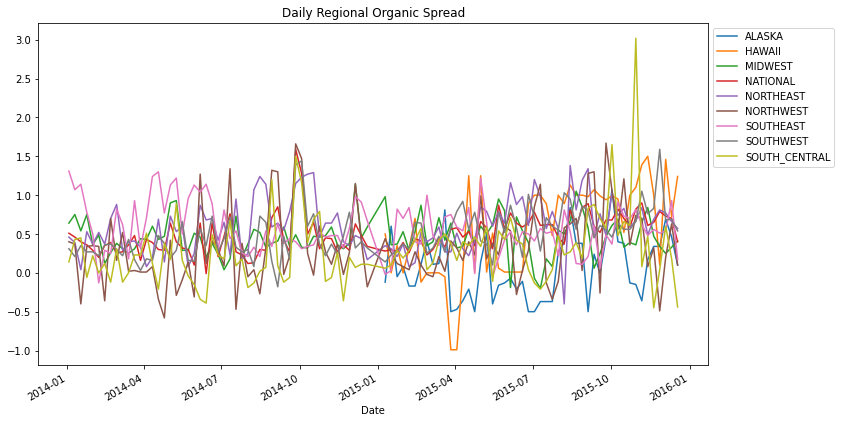

In [178]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

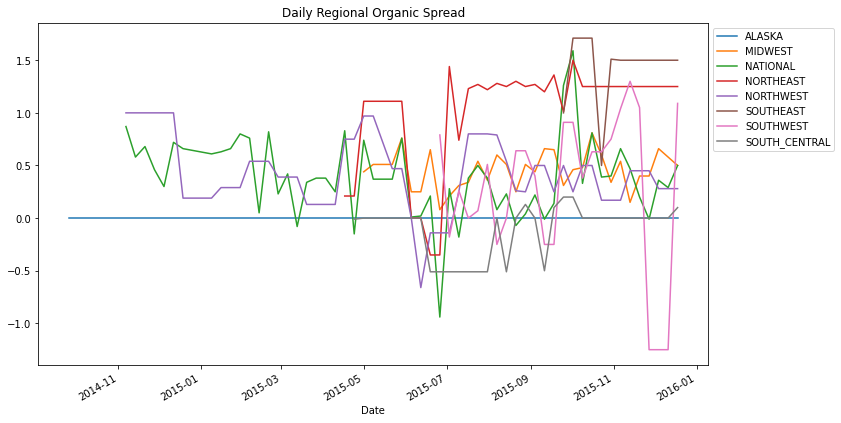

In [179]:
organic_spread_by_region(greenskin).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [180]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [181]:
correlacion_esparcida = organic_spread_by_region(greenskin).corr()
correlacion_esparcida

Region,ALASKA,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,
ALASKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIDWEST,NaN,1.000000,0.326341,0.307174,0.289433,0.041748,-0.346672,0.166863
NATIONAL,NaN,0.326341,1.000000,0.417789,0.299378,0.021097,0.250812,0.401773
NORTHEAST,NaN,0.307174,0.417789,1.000000,0.400814,0.434013,-0.149993,0.248797
NORTHWEST,NaN,0.289433,0.299378,0.400814,1.000000,0.257435,-0.111115,0.004146
SOUTHEAST,NaN,0.041748,0.021097,0.434013,0.257435,1.000000,-0.090884,-0.081374
SOUTHWEST,NaN,-0.346672,0.250812,-0.149993,-0.111115,-0.090884,1.000000,0.179237
SOUTH_CENTRAL,NaN,0.166863,0.401773,0.248797,0.004146,-0.081374,0.179237,1.000000


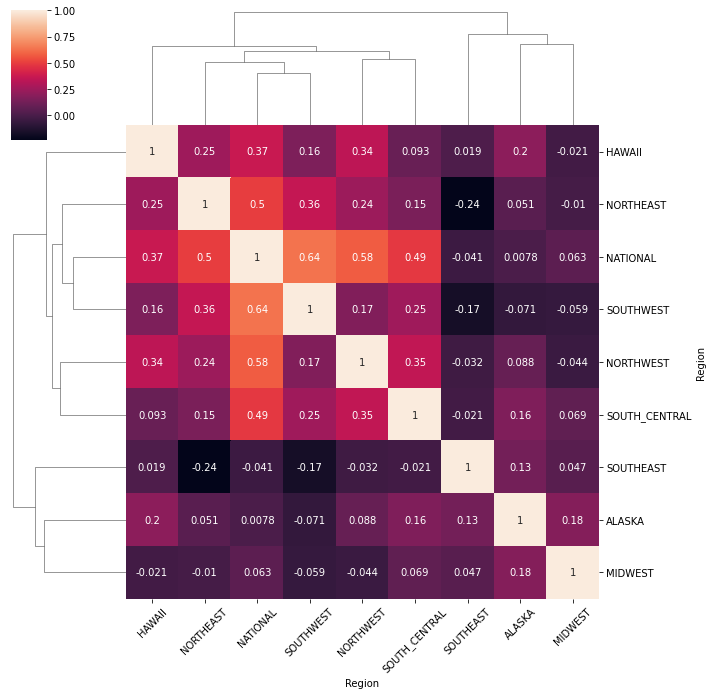

In [182]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!